In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_house = pd.read_csv("kc_house_data.csv")
data_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
correlacion = data_house.corr(numeric_only=True)
print(correlacion['price'].sort_values(ascending=False))  # Correlación de cada variable con el precio

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


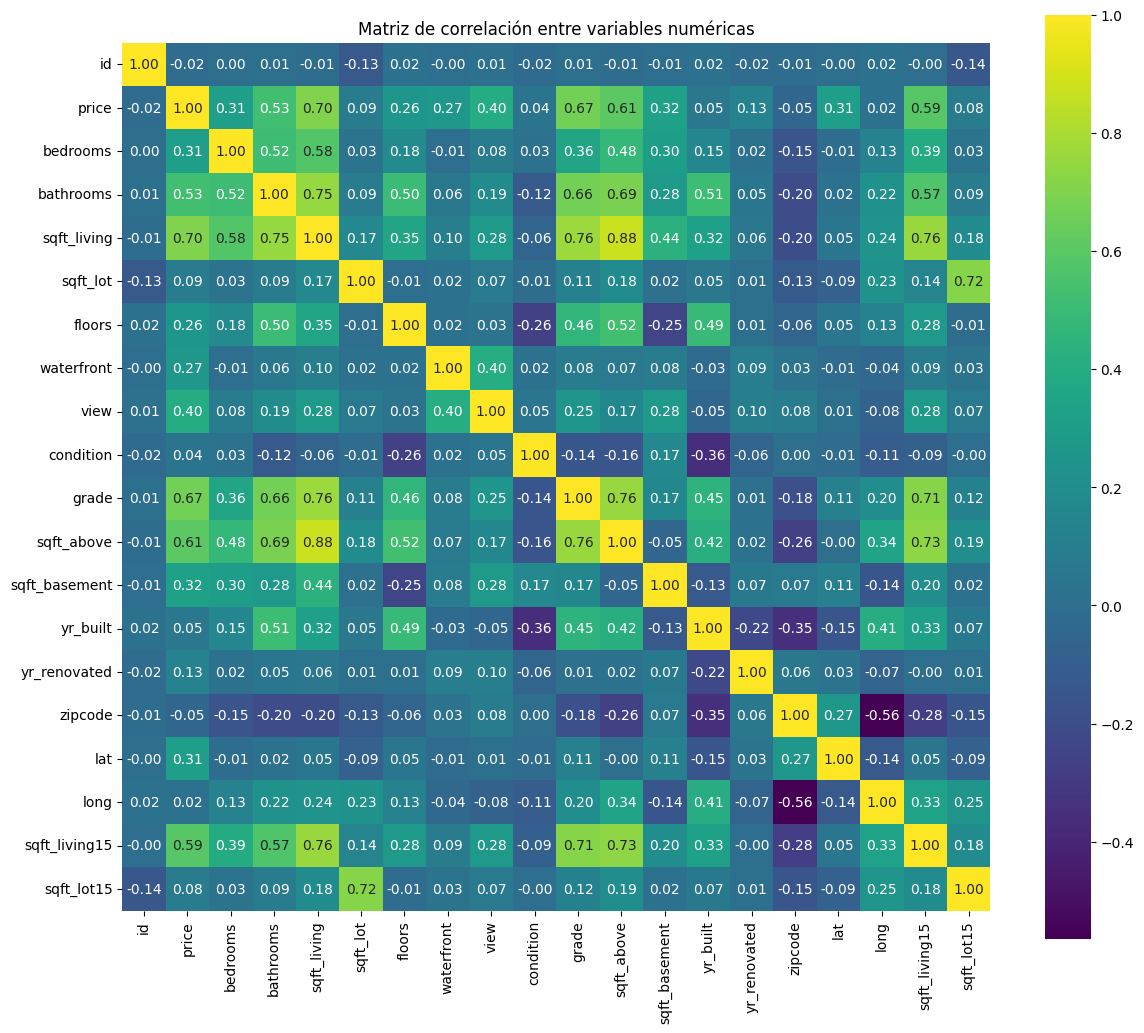

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
sns.heatmap(correlacion, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [5]:
# Eliminación de variables con baja correlación
data_house = data_house.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
print(data_house.columns.tolist())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


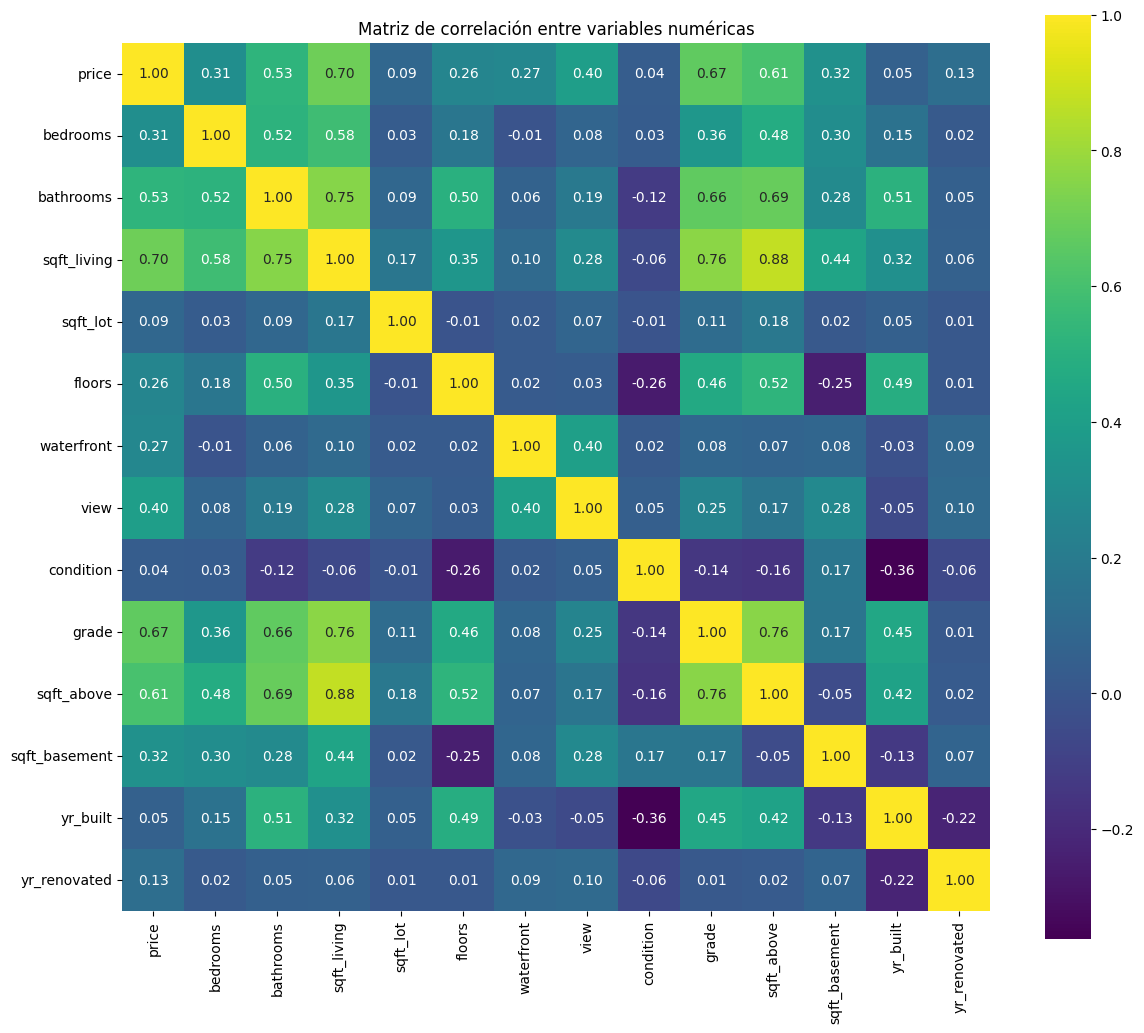

In [6]:
correlacion = data_house.corr(numeric_only=True)
plt.figure(figsize=(14, 12))
sns.heatmap(correlacion, annot=True, cmap='viridis', fmt=".2f", square=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show() 

In [7]:
Y = data_house['price'].values.reshape(-1, 1)
X = data_house.drop(columns='price').values
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [8]:
# calcular los coeficientes de la regresión lineal
XT_X = np.matmul(np.matrix.transpose(X), X)
#XT_X

In [9]:
XT_X_inv = np.linalg.inv(XT_X)
#XT_X_inv

In [10]:
XT_Y = np.matmul(np.matrix.transpose(X), Y)
#XT_Y

In [11]:
betas = np.matmul(XT_X_inv, XT_Y)
print("Coeficientes de la regresión lineal:")
print(betas)

Coeficientes de la regresión lineal:
[[ 2.16429502e+06]
 [ 1.62159145e+06]
 [ 2.65798141e+06]
 [-4.84515397e+03]
 [ 3.11787027e+00]
 [-1.13579954e+06]
 [-3.29868048e+05]
 [ 9.58260699e+04]
 [-1.32786700e+05]
 [ 1.58836235e+05]
 [ 2.36370087e+03]
 [ 1.41205039e+03]
 [-3.57053321e+03]
 [ 8.58281675e+00]]


In [12]:
y_pred = np.matmul(X, betas)
y_pred

array([[ -626146.31245027],
       [-2233014.92011789],
       [-1297063.76286784],
       ...,
       [-3857215.79783077],
       [ 1156525.57952715],
       [-3854499.56107367]])

In [13]:
residuals = Y - y_pred
residuals

array([[ 848046.31245027],
       [2771014.92011789],
       [1477063.76286784],
       ...,
       [4259316.79783077],
       [-756525.57952715],
       [4179499.56107367]])

In [14]:
# calculo de RSS

RSS = float(np.matmul(np.matrix.transpose(residuals), residuals))
RSS

9.017847240113603e+16

In [15]:
# calculo de TSS

TSS = float(np.matmul(np.matrix.transpose(Y - np.mean(Y)), Y - np.mean(Y)))
TSS

2912916761921299.5

In [16]:
# calculo de coeficiente de determinación R^2

R_squared = float(1 - (RSS / TSS))
R_squared

-29.958135700951573

In [17]:
# calculo de coeficiente de determinación R^2 ajustado

RSadj= float(1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1)))
RSadj

-29.976768774895383

In [18]:
# calculo de la varianza del error de regresión

s_cuad= RSS / (len(Y) - X.shape[1])
s_cuad

4175122570541.971

In [19]:
# calculo de desviación estándar del error de regresión
import math
s = math.sqrt(s_cuad)
s

2043311.6675000833

In [20]:
# Calculo para las t´s y p´s estadisticas de los coeficientes

import numpy as np
from scipy import stats


errores_std = np.sqrt(np.diag(XT_X_inv)).reshape(-1, 1) * s
valores_t = betas / errores_std

grados_libertad = len(Y) - X.shape[1]
valores_p = stats.t.sf(np.abs(valores_t), df=grados_libertad) * 2  # dos colas

In [21]:
# calculo de intervalos de confianza al 95% para los coeficientes

t_critico = abs(stats.t.ppf(0.025, df=grados_libertad))  # valor crítico para 95%

IC_inferior = betas - t_critico * errores_std
IC_superior = betas + t_critico * errores_std

In [22]:
# Visualizar resultados de cada variable independiente
print("Resultados de la regresión lineal:")
tabla = pd.DataFrame({
    'Coef. β': betas.flatten(),
    'Error Std': errores_std.flatten(),
    't': valores_t.flatten(),
    'p': valores_p.flatten(),
    'IC 95% Inferior': IC_inferior.flatten(),
    'IC 95% Superior': IC_superior.flatten()
})

print(tabla.round(4))

Resultados de la regresión lineal:
         Coef. β     Error Std        t       p  IC 95% Inferior  \
0   2.164295e+06  1.305615e+06   1.6577  0.0974    -3.948060e+05   
1   1.621591e+06  1.914264e+04  84.7109  0.0000     1.584070e+06   
2   2.657981e+06  3.298882e+04  80.5722  0.0000     2.593321e+06   
3  -4.845154e+03  8.541988e+08  -0.0000  1.0000    -1.674298e+09   
4   3.117900e+00  3.457000e-01   9.0185  0.0000     2.440200e+00   
5  -1.135800e+06  3.528416e+04 -32.1901  0.0000    -1.204959e+06   
6  -3.298680e+05  1.761195e+05  -1.8730  0.0611    -6.750752e+05   
7   9.582607e+04  2.130186e+04   4.4985  0.0000     5.407285e+04   
8  -1.327867e+05  2.359719e+04  -5.6272  0.0000    -1.790389e+05   
9   1.588362e+05  2.044100e+04   7.7705  0.0000     1.187704e+05   
10  2.363701e+03  8.541988e+08   0.0000  1.0000    -1.674290e+09   
11  1.412050e+03  8.541988e+08   0.0000  1.0000    -1.674291e+09   
12 -3.570533e+03  6.692555e+02  -5.3351  0.0000    -4.882323e+03   
13  8.582800e

In [23]:
# Criterio 1, comparando con el valor crítico de t
for i in range(X.shape[1]):
    t_val = valores_t[i][0]
    p_val = valores_p[i][0]
    if abs(t_val) > t_critico:
        print(f"β{i + 1} es significativo (t ={t_val:.3f}, p ={p_val:.3f})")
    else:
        print(f"β{i + 1} NO es significativo (t ={t_val:.3f}, p ={p_val:.3f})")

β1 NO es significativo (t =1.658, p =0.097)
β2 es significativo (t =84.711, p =0.000)
β3 es significativo (t =80.572, p =0.000)
β4 NO es significativo (t =-0.000, p =1.000)
β5 es significativo (t =9.019, p =0.000)
β6 es significativo (t =-32.190, p =0.000)
β7 NO es significativo (t =-1.873, p =0.061)
β8 es significativo (t =4.498, p =0.000)
β9 es significativo (t =-5.627, p =0.000)
β10 es significativo (t =7.770, p =0.000)
β11 NO es significativo (t =0.000, p =1.000)
β12 NO es significativo (t =0.000, p =1.000)
β13 es significativo (t =-5.335, p =0.000)
β14 NO es significativo (t =0.232, p =0.816)


In [24]:
# Criterio 2, comparando con el valor p
for i in range(X.shape[1]):
    if valores_p[i][0] < 0.05:
        print(f"β{i+1} significativo (p = {valores_p[i][0]:.4f})")
    else:
        print(f"β{i+1} NO significativo (p = {valores_p[i][0]:.4f})")

β1 NO significativo (p = 0.0974)
β2 significativo (p = 0.0000)
β3 significativo (p = 0.0000)
β4 NO significativo (p = 1.0000)
β5 significativo (p = 0.0000)
β6 significativo (p = 0.0000)
β7 NO significativo (p = 0.0611)
β8 significativo (p = 0.0000)
β9 significativo (p = 0.0000)
β10 significativo (p = 0.0000)
β11 NO significativo (p = 1.0000)
β12 NO significativo (p = 1.0000)
β13 significativo (p = 0.0000)
β14 NO significativo (p = 0.8164)


In [25]:
# Criterio 3, comparando con el intervalo de confianza

for i in range(X.shape[1]):
    inf = IC_inferior[i][0]
    sup = IC_superior[i][0]
    if inf * sup > 0:
        print(f"β{i+1} significativo (IC: [{inf:.3f}, {sup:.3f}])")
    else:
        print(f"β{i+1} NO significativo (IC: [{inf:.3f}, {sup:.3f}])")

β1 NO significativo (IC: [-394806.003, 4723396.053])
β2 significativo (IC: [1584070.461, 1659112.447])
β3 significativo (IC: [2593320.894, 2722641.932])
β4 NO significativo (IC: [-1674297511.600, 1674287821.292])
β5 significativo (IC: [2.440, 3.796])
β6 significativo (IC: [-1204959.089, -1066639.989])
β7 NO significativo (IC: [-675075.185, 15339.089])
β8 significativo (IC: [54072.850, 137579.290])
β9 significativo (IC: [-179038.932, -86534.468])
β10 significativo (IC: [118770.367, 198902.104])
β11 NO significativo (IC: [-1674290302.745, 1674295030.147])
β12 NO significativo (IC: [-1674291254.396, 1674294078.496])
β13 significativo (IC: [-4882.323, -2258.743])
β14 NO significativo (IC: [-63.877, 81.043])


In [26]:
# Comparación de resultados contra reporte automatizado de statsmodels
import statsmodels.api as sm

regresor =sm.OLS(Y, X).fit()
print(regresor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3377.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:57:56   Log-Likelihood:            -2.9619e+05
No. Observations:               21613   AIC:                         5.924e+05
Df Residuals:                   21600   BIC:                         5.925e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.193e+06   1.38e+05     44.756      0.0

In [27]:
for i, col in enumerate(data_house.columns, start=1):
    print(f"{i}. {col}")



1. price
2. bedrooms
3. bathrooms
4. sqft_living
5. sqft_lot
6. floors
7. waterfront
8. view
9. condition
10. grade
11. sqft_above
12. sqft_basement
13. yr_built
14. yr_renovated


In [28]:
data = pd.DataFrame(X)
data2 = data.iloc[:,1:14]
data2.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841
2,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739
3,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363
4,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644
5,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338
6,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885
7,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917
8,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618
9,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414
10,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285


In [29]:
# eliminando la ultima columna yr_renovated
X_nueva = np.delete(X, -1, axis=1)
X_nueva

array([[1.000e+00, 3.000e+00, 1.000e+00, ..., 1.180e+03, 0.000e+00,
        1.955e+03],
       [1.000e+00, 3.000e+00, 2.250e+00, ..., 2.170e+03, 4.000e+02,
        1.951e+03],
       [1.000e+00, 2.000e+00, 1.000e+00, ..., 7.700e+02, 0.000e+00,
        1.933e+03],
       ...,
       [1.000e+00, 2.000e+00, 7.500e-01, ..., 1.020e+03, 0.000e+00,
        2.009e+03],
       [1.000e+00, 3.000e+00, 2.500e+00, ..., 1.600e+03, 0.000e+00,
        2.004e+03],
       [1.000e+00, 2.000e+00, 7.500e-01, ..., 1.020e+03, 0.000e+00,
        2.008e+03]])

In [30]:
regresor = sm.OLS(Y, X_nueva).fit()
print(regresor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3682.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:57:56   Log-Likelihood:            -2.9619e+05
No. Observations:               21613   AIC:                         5.924e+05
Df Residuals:                   21601   BIC:                         5.925e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.292e+06   1.31e+05     48.114      0.0

In [31]:
# Nuevo calculo de coeficientes y estadísticas con la nueva matriz X_nueva
XT_X_nueva = np.matmul(np.matrix.transpose(X_nueva), X_nueva)
XT_X_inv_nueva = np.linalg.inv(XT_X_nueva)
XT_Y_nueva = np.matmul(np.matrix.transpose(X_nueva), Y)
betas_nueva = np.matmul(XT_X_inv_nueva, XT_Y_nueva)
y_pred_nueva = np.matmul(X_nueva, betas_nueva)
residuals_nueva = Y - y_pred_nueva
RSS_nueva = float(np.matmul(np.matrix.transpose(residuals_nueva), residuals_nueva))
TSS_nueva = float(np.matmul(np.matrix.transpose(Y - np.mean(Y)), Y - np.mean(Y)))
R_squared_nueva = float(1 - (RSS_nueva / TSS_nueva))
RSadj_nueva = float(1 - (RSS_nueva / (X_nueva.shape[0] - X_nueva.shape[1])) / (TSS_nueva / (X_nueva.shape[0] - 1)))
s_cuad_nueva = RSS_nueva / (len(Y) - X_nueva.shape[1])
s_nueva = math.sqrt(s_cuad_nueva)
errores_std_nueva = np.sqrt(np.diag(XT_X_inv_nueva)).reshape(-1, 1) * s_nueva
valores_t_nueva = betas_nueva / errores_std_nueva
valores_p_nueva = stats.t.sf(np.abs(valores_t_nueva), df=len(Y) - X_nueva.shape[1]) * 2# dos colas 
t_critico_nueva = abs(stats.t.ppf(0.025, df=len(Y) - X_nueva.shape[1]))  # valor crítico para 95%
IC_inferior_nueva = betas_nueva - t_critico_nueva * errores_std_nueva
IC_superior_nueva = betas_nueva + t_critico_nueva * errores_std_nueva

In [32]:
#Criterio 1N, comparando con el valor crítico de t

for i in range(X_nueva.shape[1]):
    t_val_nueva = valores_t_nueva[i][0]
    p_val_nueva = valores_p_nueva[i][0]
    if abs(t_val_nueva) > t_critico_nueva:
        print(f"β{i + 1} es significativo (t ={t_val_nueva:.3f}, p ={p_val_nueva:.3f})")
    else:
        print(f"β{i + 1} NO es significativo (t ={t_val_nueva:.3f}, p ={p_val_nueva:.3f})")

β1 es significativo (t =3.721, p =0.000)
β2 es significativo (t =53.744, p =0.000)
β3 es significativo (t =-41.479, p =0.000)
β4 NO es significativo (t =-0.000, p =1.000)
β5 NO es significativo (t =1.606, p =0.108)
β6 NO es significativo (t =1.743, p =0.081)
β7 es significativo (t =2.028, p =0.043)
β8 NO es significativo (t =1.803, p =0.071)
β9 NO es significativo (t =0.029, p =0.977)
β10 es significativo (t =2.107, p =0.035)
β11 NO es significativo (t =0.000, p =1.000)
β12 NO es significativo (t =0.000, p =1.000)
β13 es significativo (t =-3.940, p =0.000)


In [33]:
# Criterio 2N, comparando con el valor p
for i in range(X_nueva.shape[1]):
    if valores_p_nueva[i][0] < 0.05:
        print(f"β{i+1} significativo (p = {valores_p_nueva[i][0]:.4f})")
    else:
        print(f"β{i+1} NO significativo (p = {valores_p_nueva[i][0]:.4f})")

β1 significativo (p = 0.0002)
β2 significativo (p = 0.0000)
β3 significativo (p = 0.0000)
β4 NO significativo (p = 1.0000)
β5 NO significativo (p = 0.1082)
β6 NO significativo (p = 0.0813)
β7 significativo (p = 0.0426)
β8 NO significativo (p = 0.0714)
β9 NO significativo (p = 0.9769)
β10 significativo (p = 0.0352)
β11 NO significativo (p = 1.0000)
β12 NO significativo (p = 1.0000)
β13 significativo (p = 0.0001)


In [34]:
# Criterio 3N, comparando con el intervalo de confianza

print("Resultados de la regresión lineal con X_nueva:")
print("IC = Intervalo de Confianza al 95%\n")
for i in range(X_nueva.shape[1]):
    inf_nueva = IC_inferior_nueva[i][0]
    sup_nueva = IC_superior_nueva[i][0]
    if inf_nueva * sup_nueva > 0:
        print(f"β{i+1} significativo (IC: [{inf_nueva:.3f}, {sup_nueva:.3f}])")
    else:
        print(f"β{i+1} NO significativo (IC: [{inf_nueva:.3f}, {sup_nueva:.3f}])")

Resultados de la regresión lineal con X_nueva:
IC = Intervalo de Confianza al 95%

β1 significativo (IC: [3148183.762, 10155201.645])
β2 significativo (IC: [1435441.164, 1544106.222])
β3 significativo (IC: [-2057666.549, -1871974.872])
β4 NO significativo (IC: [-2100568697.500, 2100562859.601])
β5 NO significativo (IC: [-0.177, 1.786])
β6 NO significativo (IC: [-11062.117, 189117.662])
β7 significativo (IC: [17221.829, 1015755.415])
β8 NO significativo (IC: [-4852.737, 116091.276])
β9 NO significativo (IC: [-65121.568, 67077.911])
β10 significativo (IC: [4340.738, 120421.207])
β11 NO significativo (IC: [-2100564124.909, 2100567432.191])
β12 NO significativo (IC: [-2100563626.093, 2100567931.008])
β13 significativo (IC: [-5420.927, -1819.439])
